1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Eigenvalue:
 [2.84783239e+01 2.61492812e-15 2.07706972e+00] 

Eigenvector:
 [[-0.11623719 -0.81649658  0.56552829]
 [-0.57639069 -0.40824829 -0.70788919]
 [-0.80886506  0.40824829  0.42316739]] 

Eigenvalues results using SVD: True
Eigenvectors resutls using SVD: True 

By selecting the component 0 and 2, we retain 100.00% of the total variability
the new V is:
 [[-0.11623719  0.56552829]
 [-0.57639069 -0.70788919]
 [-0.80886506  0.42316739]]


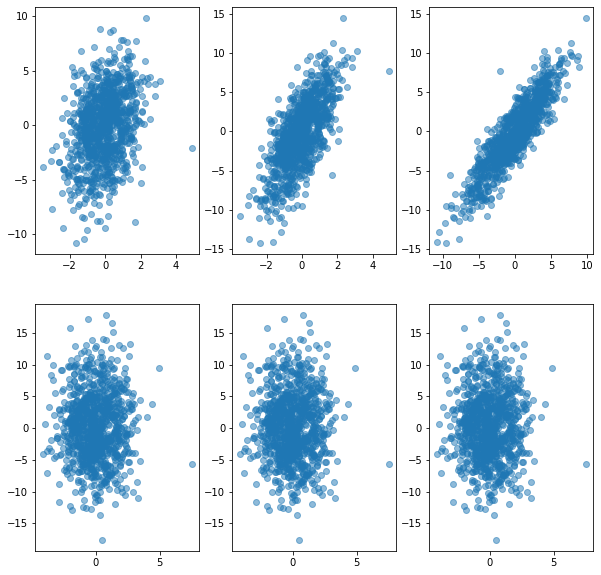

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la

#dataset simulating 3 features
N = 1000
x1 = np.random.normal(0, 1, 1000)
x2 = x1 + np.random.normal(0, 3, 1000)
x3 = 2 * x1 + x2
A = np.row_stack((x1, x2, x3))

#eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
cov = np.cov(A)
l, V = la.eig(cov)
l = np.real_if_close(l)
print("Eigenvalue:\n", l, '\n')
print("Eigenvector:\n", V, '\n')

# eigenvectors and eigenvalues using the SVD
U, S, Vt = la.svd(cov)
S[[1,2]] = S[[2,1]]
l_svd = S
U[:,[1,2]] = U[:,[2,1]]
V_svd = U
print('Eigenvalues results using SVD:',np.allclose(l,l_svd))
print('Eigenvectors resutls using SVD:',np.allclose(V,V_svd),'\n')


print("By selecting the component 0 and 2, we retain %.2f%% of the total variability" % ((np.sum([l[0],l[2]])/np.sum(l))*100))
new_V = V[:,[0,2]]
print('the new V is:\n',new_V)

#Redefining the data according to the new basis from the PCA
New_matrix = np.dot(new_V.T,A)

#Plotting the data
fig, axes = plt.subplots(2,3,figsize=(10, 10))
axes[0,0].scatter(A[0,:],A[1,:], alpha=0.5)
axes[0,1].scatter(A[0,:],A[2,:], alpha=0.5)
axes[0,2].scatter(A[1,:],A[2,:], alpha=0.5)
axes[1,0].scatter(New_matrix[1,:],New_matrix[0,:], alpha=0.5)
axes[1,1].scatter(New_matrix[1,:],New_matrix[0,:], alpha=0.5)
axes[1,2].scatter(New_matrix[1,:],New_matrix[0,:], alpha=0.5)



2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

Eigenvalues:
 [2.84783239e+01 2.61492812e-15 2.07706972e+00] 

Eigenvectors:
 [[-0.11623719 -0.81649658  0.56552829]
 [-0.57639069 -0.40824829 -0.70788919]
 [-0.80886506  0.40824829  0.42316739]] 

By selecting the component 0 and 2, we retain 100.00% of the total variability
the new value of V:
 [[-0.11623719  0.56552829]
 [-0.57639069 -0.70788919]
 [-0.80886506  0.42316739]]


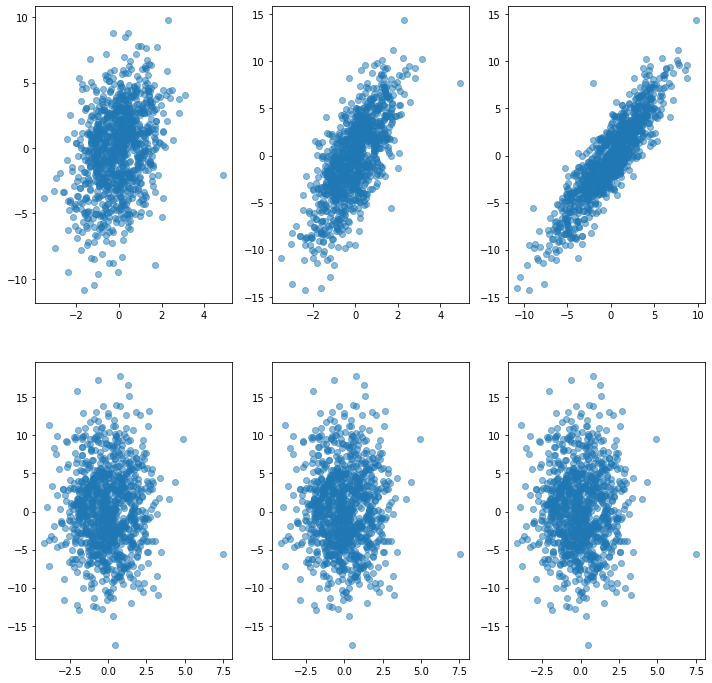

In [2]:
noise = 0
for i in range(10):
    noise += np.random.normal(size=(N,3),scale=(1/20))
new_A = A + noise.T
cov = np.cov(A)
l, V = la.eig(cov)
l = np.real_if_close(l)
print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')
print("By selecting the component 0 and 2, we retain %.2f%% of the total variability" % 
      ((np.sum([l[0],l[2]])/np.sum(l))*100))
new_V = V[:,[0,2]]
print('the new value of V:\n',new_V)
New_matrix = np.dot(new_V.T,A)

#potting the data
fig, axes = plt.subplots(2,3,figsize=(12, 12))
axes[0,0].scatter(A[0,:],A[1,:], alpha=0.5)
axes[0,1].scatter(A[0,:],A[2,:], alpha=0.5)
axes[0,2].scatter(A[1,:],A[2,:], alpha=0.5)
axes[1,0].scatter(New_matrix[1,:],New_matrix[0,:], alpha=0.5)
axes[1,1].scatter(New_matrix[1,:],New_matrix[0,:], alpha=0.5)
axes[1,2].scatter(New_matrix[1,:],New_matrix[0,:], alpha=0.5)



3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [3]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

--2022-12-14 17:51:54--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1,4M) [application/x-httpd-php]
Saving to: ‘data/magic04.data’

magic04.data        100%[===================>]   1,41M   807KB/s    in 1,8s    

2022-12-14 17:51:57 (807 KB/s) - ‘data/magic04.data’ saved [1477391/1477391]



In [9]:
import pandas as pd

# Reading the data
file = 'data/magic04.data'
data = pd.read_csv(file, header=None)

F = data.to_numpy()
F = F[0:,0:10]
F = np.asarray(F,dtype='float32')

# Matrix transposition and coverangince
F = F.T
C = np.cov(F)

l, V  = la.eig(C) 
l = np.real_if_close(l)

Fp = np.dot(V.T, F) 

lam = np.diag(l)

for i in range(len(l)):
    print('Component ' + str(i) +': %.2f%% of total variability gained' % (100*abs((lam[i,i]/lam.trace()))))

sort_l = np.sort(l) # Sort eigenvalues in ascending order.
sort_l = sort_l[::-1] # Reverse the vector

total_variability = 0
number_of_features = 0
for i in range(len(sort_l)):
    if total_variability >= 99:
        break
    total_variability += abs(100*(sort_l[i]/lam.trace()))
    number_of_features +=1



Component 0: 44.05% of total variability gained
Component 1: 25.80% of total variability gained
Component 2: 13.50% of total variability gained
Component 3: 8.88% of total variability gained
Component 4: 4.08% of total variability gained
Component 5: 2.90% of total variability gained
Component 6: 0.79% of total variability gained
Component 7: 0.00% of total variability gained
Component 8: 0.00% of total variability gained
Component 9: 0.00% of total variability gained
